# Computer Vision Python Quick Starts

This article provides information and code samples to help you quickly get started using the Computer Vision API with Python to accomplish the following tasks:
* [Analyze an image](#AnalyzeImage)
* [Use a Domain-Specific Model](#DomainSpecificModel)
* [Intelligently generate a thumbnail](#GetThumbnail)
* [Detect and extract printed text from an image](#OCR)
* [Detect and extract handwritten text from an image](#RecognizeText)

To use the Computer Vision API, you need a subscription key. You can get free subscription keys [here](https://docs.microsoft.com/en-us/azure/cognitive-services/Computer-vision/Vision-API-How-to-Topics/HowToSubscribe).

You can run this example as a Jupyter notebook on [MyBinder](https://mybinder.org) by clicking on the launch Binder badge: 


[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Microsoft/cognitive-services-notebooks/master?filepath=VisionAPI.ipynb)


## Analyze an Image With Computer Vision API Using Python 
<a name="AnalyzeImage"> </a>

With the [Analyze Image method](https://westcentralus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa), you can extract visual features based on image content. You can upload an image or specify an image URL and choose which features to return, including:
* A detailed list of tags related to the image content.
* A description of image content in a complete sentence.
* The coordinates, gender, and age of any faces contained in the image.
* The ImageType (clip art or a line drawing).
* The dominant color, the accent color, or whether an image is black & white.
* The category defined in this [taxonomy](https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/category-taxonomy).
* Does the image contain adult or sexually suggestive content?

### Analyze an Image Python Example Request
To begin analyzing images, please replace `subscription_key` below with a valid API key that you obtained earlier.

In [1]:
subscription_key = None
assert subscription_key

Next, please ensure that region in `vision_base_url` below corresponds to the one where you generated the API key (`westus`, `westcentralus`, etc.). Free trial subscription keys are generated in the `westcentralus` region, so if you are using a free trial subscription key, you are good to go!

In [2]:
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/"

The image analysis URL looks like this (see REST API docs [here](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa)):
<code>
https://[location].api.cognitive.microsoft.com/vision/v1.0/<b>analyze</b>[?visualFeatures][&details][&language]
</code>

In [3]:
vision_analyze_url = vision_base_url + "analyze"

Now let's analyze our first image! Replace `image_url` with the URL of any other image that you want to analyze.

In [4]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"

The following block uses the `requests` library in Python to call out to the Computer Vision `analyze` API and return the results as a JSON object. Observe that we pass in the API key via the `headers` dictionary and the types of features to recognize via the `params` dictionary. To see the full list of options that can be used, please see the [REST API](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa) documentation for image analysis.

In [5]:
import requests
headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
params   = {'visualFeatures': 'Categories,Description,Color'}
data     = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

The `analysis` object contains various fields that describe the image. We can get the most relevant caption for the image using the `descriptions` property.

In [6]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image_caption

'A group of people on a city street at night'

We can now display the image and overlay it with the inferred caption from the Vision service.

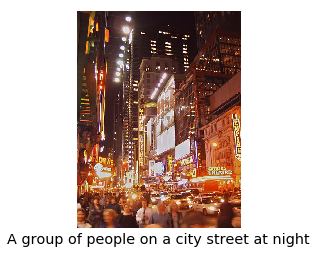

In [7]:
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)

## Use a Domain-Specific Model <a name="DomainSpecificModel"> </a>

The [Domain-Specific Model](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fd)  is a model trained to identify a specific set of objects in an image.  The two domain-specific models that are currently available are _celebrities_ and _landmarks_. 

To view the list of domain-specific models supported, you can make the following request against the service.

In [8]:
model_url = vision_base_url + "models"
headers   = {'Ocp-Apim-Subscription-Key': subscription_key}
models    = requests.get(model_url, headers=headers).json()
[model["name"] for model in models["models"]]

['celebrities', 'landmarks']

### Landmark identification
We will now use the domain-specific model to identify landmarks in an image. As before, we set `image_url` to point to an image to be analyzed for landmarks.

In [9]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/f/f6/Bunker_Hill_Monument_2005.jpg"

The service endpoint to analyze images for landmarks looks like this:

In [10]:
landmark_analyze_url = vision_base_url + "models/landmarks/analyze"
landmark_analyze_url

'https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/models/landmarks/analyze'

We can now analyze the image in `image_url` to detect landmarks. The identified landmark is stored in `landmark_name`.

In [11]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'model': 'landmarks'}
data     = {'url': image_url}
response = requests.post(landmark_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis      = response.json()
assert analysis["result"]["landmarks"] is not []

landmark_name = analysis["result"]["landmarks"][0]["name"].capitalize()

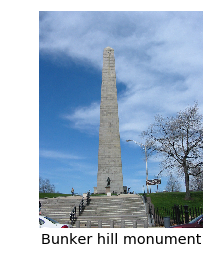

In [12]:
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(landmark_name, size="x-large", y=-0.1)

### Celebrity identification
Along the same lines, the domain-specific model for identifying celebrities can be invoked as shown next. First we set `image_url` to point to the image of a celebrity.

In [13]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/Bill_gates_portrait.jpg"

The service end-point for detecting celebrity images looks as shown below

In [14]:
celebrity_analyze_url = vision_base_url + "models/celebrities/analyze"
celebrity_analyze_url

'https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/models/celebrities/analyze'

Next, we can call the end-point and obtain information about the celebrities detected in the image.

In [15]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'model': 'celebrities'}
data     = {'url': image_url}
response = requests.post(celebrity_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

In [16]:
analysis

{'metadata': {'format': 'Jpeg', 'height': 521, 'width': 550},
 'requestId': 'd1a98da7-a46f-43ed-b6ac-9144988087c1',
 'result': {'celebrities': [{'confidence': 0.9993845224380493,
    'faceRectangle': {'height': 187, 'left': 156, 'top': 123, 'width': 187},
    'name': 'Bill Gates'}]}}

We can now annotate the image with the information returned by the service in the code below:

In [17]:
assert analysis["result"]["celebrities"] is not []
celebrity_info = analysis["result"]["celebrities"][0]
celebrity_name = celebrity_info["name"]
celebrity_face = celebrity_info["faceRectangle"]

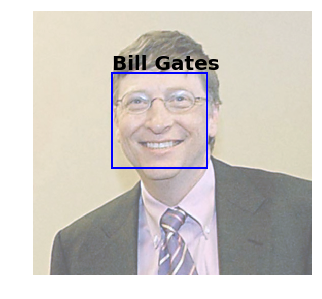

In [18]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.6)
origin = (celebrity_face["left"], celebrity_face["top"])
p      = Rectangle(origin, celebrity_face["width"], celebrity_face["height"], 
                   fill=False, linewidth=2, color='b')
ax.axes.add_patch(p)
plt.text(origin[0], origin[1], celebrity_name, fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

## Get a Thumbnail with Computer Vision API
<a name="GetThumbnail"> </a>

Use the [Get Thumbnail method](https://westcentralus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fb) to crop an image based on its region of interest (ROI) to the height and width you desire. The aspect ratio you set for the thumbnail can be different from the aspect ratio of the input image.

To generate the thumbnail for an image, first set `image_url` to point to its location. 

In [19]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/9/94/Bloodhound_Puppy.jpg"

The service end-point to generate the thumbnail is the following

In [20]:
thumbnail_url = vision_base_url + "generateThumbnail"
thumbnail_url

'https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/generateThumbnail'

Next, we generate thumbnail image by calling out to the end-point as follows:

In [21]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'width': '50', 'height': '50','smartCropping': 'true'}
data     = {'url': image_url}
response = requests.post(thumbnail_url, headers=headers, params=params, json=data)
response.raise_for_status()

We can verify that the thumbnail is indeed $50\times50$ pixels using the Python Image Library.

Thumbnail is 50-by-50


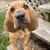

In [22]:
thumbnail = Image.open(BytesIO(response.content))
print("Thumbnail is {0}-by-{1}".format(*thumbnail.size))
thumbnail

## Optical Character Recognition (OCR) with Computer Vision API <a name="OCR"> </a>

Use the [Optical Character Recognition (OCR) method](https://westcentralus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc) to detect text in an image and extract recognized characters into a machine-usable character stream.

To illustrate the OCR API, set `image_url` to point to the text to be recognized.

In [23]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png"

The service end-point for OCR for your region is shown below:

In [24]:
ocr_url = vision_base_url + "ocr"
ocr_url

'https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/ocr'

Now, we can call into the OCR service to get the text that was recognized along with bounding boxes. In the parameters below `"language": "unk"` automatically detects the language in the text and `"detectOrientation": "true"` automatically aligns the image. For more documentation on the parameters that can be passed to the service, please refer to the [REST API](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc) documentation.

In [25]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'language': 'unk', 'detectOrientation ': 'true'}
data     = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

We can now extract the word bounding boxes and text from the results of analysis using the following lines of code.

In [26]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '28,16,288,41', 'text': 'NOTHING'},
 {'boundingBox': '27,66,283,52', 'text': 'EXISTS'},
 {'boundingBox': '27,128,292,49', 'text': 'EXCEPT'},
 {'boundingBox': '24,188,292,54', 'text': 'ATOMS'},
 {'boundingBox': '22,253,105,32', 'text': 'AND'},
 {'boundingBox': '144,253,175,32', 'text': 'EMPTY'},
 {'boundingBox': '21,298,304,60', 'text': 'SPACE.'},
 {'boundingBox': '26,387,210,37', 'text': 'Everything'},
 {'boundingBox': '249,389,71,27', 'text': 'else'},
 {'boundingBox': '127,431,31,29', 'text': 'is'},
 {'boundingBox': '172,431,153,36', 'text': 'opinion.'}]

Finally, we can overlay the recognized text on top of the original image using the `matplotlib` library.

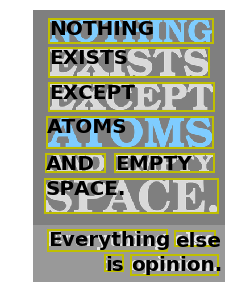

In [27]:
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")

## Text recognition with Computer Vision API <a name="RecognizeText"> </a>

Use the [RecognizeText method](https://ocr.portal.azure-api.net/docs/services/56f91f2d778daf23d8ec6739/operations/587f2c6a154055056008f200) to detect handwritten or printed text in an image and extract recognized characters into a machine-usable character stream.

Set `image_url` to point to the image to be recognized.

In [28]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Cursive_Writing_on_Notebook_paper.jpg/800px-Cursive_Writing_on_Notebook_paper.jpg"

The service end-point for the text recognition service is the following:

In [29]:
text_recognition_url = vision_base_url + "RecognizeText"
text_recognition_url

'https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/RecognizeText'

We next call out to the service to recognize the text. In the parameters below, set `handwriting` to `false` to recognize only printed text.

In [30]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'handwriting' : True}
data     = {'url': image_url}
response = requests.post(text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

The text recognition service does not return the recognized text _per se_. Instead, it returns immediatedly with a "Operation Location" URL in the response header that must be polled to get the result of the operation.

In [31]:
operation_url = response.headers["Operation-Location"]

Once we have this URL, we can query it for the analyzed text. Notice that we use HTTP `GET` instead of `POST` and need to implement a poll loop in order to wait for the operation to succeed.

In [32]:
import time

analysis = {}
while not "recognitionResult" in analysis:
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis       = response_final.json()
    time.sleep(1)

Next, we can extract the bounding boxes for the text that was recognized along with the text itself. An important point to note is that the handwritten text recognition API returns bounding boxes as **polygons** instead of **rectangles**. Each polygon is $p$ is defined by its vertifies specified using the following convention:

$p = [x_1, y_1, x_2, y_2, \ldots, x_N, y_N]$

In [33]:
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]

Finally, we overlay the recognized text on top of the original image using the polygon information we just extracted. Notice that `matplotlib` requires the vertices to be specified as a list of tuples of the form:

$p = [(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)]$

and the post-processing code transforms the polygon data returned by the service into the form required by `matplotlib`.

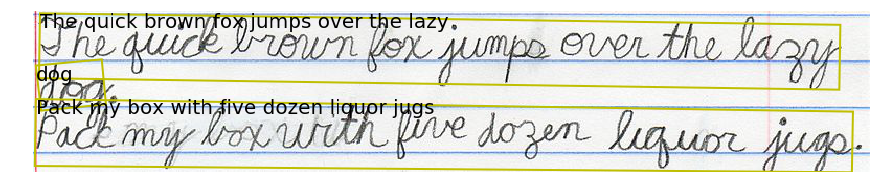

In [34]:
from matplotlib.patches import Polygon

plt.figure(figsize=(15,15))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True,fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")

## Analyze an Image Stored on Disk
The Computer Vision REST APIs don't just accept URLs to publically-accessible images. They can also be provided the image to be analyzed as part of the HTTP body. For mode details of this feature, please see the documentation [here](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa). 

The code in this section uses this feature to analyze a sample image on disk. The primary difference between passing in an image URL vs. image data is that the header to the request must contain an entry of the form:
```py
{"Content-Type": "application/octet-stream"}
```
and the binary image data must be passed in via the `data` parameter to `requests.post` as opposed to the `json` parameter.

First, we download a sample image from the [Computer Vision API](https://azure.microsoft.com/en-us/services/cognitive-services/computer-vision/) page to the local file system and make `image_path` point to it.

In [35]:
%%bash
mkdir -p images
curl -Ls https://aka.ms/csnb-house-yard -o images/house_yard.jpg

In [36]:
image_path = "images/house_yard.jpg"

We then read it into a byte array and send it to the Vision service to be analyzed.

In [37]:
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key, 
              "Content-Type": "application/octet-stream" }
params     = {'visualFeatures': 'Categories,Description,Color'}
response   = requests.post(vision_analyze_url, 
                           headers=headers, 
                           params=params, 
                           data=image_data)

response.raise_for_status()

analysis      = response.json()
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image_caption

'A large lawn in front of a house'

As before, we can overlay the caption on the image. We use a slightly different function since the image is available locally.

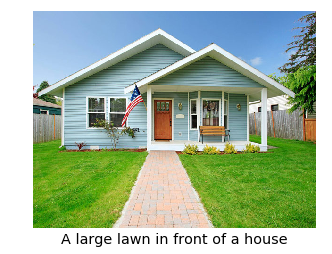

In [38]:
image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)